In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Translational invariance

(64, 68)


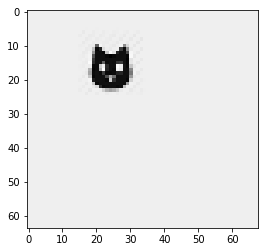

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

#image = mpimg.imread("sobel1.jpg")
image1 = mpimg.imread("Cat11.png")
image1 = rgb2gray(image1)
print(image1.shape)
plt.imshow(image1,cmap="gray")
plt.show()

(64, 67)


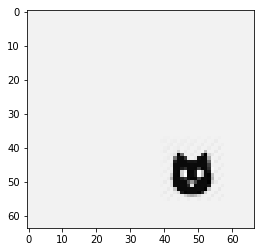

In [3]:
#image = mpimg.imread("sobel1.jpg")
image2 = mpimg.imread("Cat22.png")
image2 = rgb2gray(image2)
print(image2.shape)
plt.imshow(image2,cmap="gray")
plt.show()

# CONV_2D
x is the input – pixel values from the image.   W are the weights defined in the filter. The weights are defined as a four-dimensional tensor: [filter_height, filter_width, input_depth, output_depth].

input_depth represents the number of layers in the image, for example three layers for RGB.

output_depth represents the number of filters that should be applied to the image. Each filter is run through all the input layers, using a filter size defined by filter_height and filter_width, multiplies each input pixel by a weight, and sums up the results.

stride is the speed by which the filter moves across the image, or the number of pixels it shifts every time. The stride is defined as a 4D tensor, because the input has four dimensions: [number_of_samples, height, width, colour_channels]. Setting the strides tensor to [1, strides, strides, 1] applies the filter to every image, every color channel, and every image patch in the height and width dimensions. 1 at the beginning and end specifies you won’t skip an image or an entire color channel. For example, strides=[1, 2, 2, 1] applies the filter to half the image patches in each dimension, and skips half.

In [4]:
#Define the kernel
k = tf.constant([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=tf.float64)

kernel = tf.reshape(k, [3, 3, 1, 1])

#Convert image to tensor
X = tf.convert_to_tensor(image1)

#Convert image to 4D tensor
inp1 = tf.reshape(X, [-1, 64,68,1])

#------------------- conv(image)-> maxpool ------------------
# first Convolutional Layer with stride 1
conv1 = tf.nn.conv2d(inp1, kernel, [1, 1, 1, 1],padding="VALID")

# Max Pooling (down-sampling) with strides of 2 and kernel size of 3
pool1 = tf.nn.max_pool(conv1, ksize=[1,3,3,1],strides = [1,2,2,1],padding='VALID')


#Flat layer
fc1 = tf.layers.flatten(pool1)

Y = tf.convert_to_tensor(image2)

#--------------------------conv(translated_image)-> maxpool----------------
inp2 = tf.reshape(Y, [-1, 64,67,1])
# first Convolutional Layer
conv2 = tf.nn.conv2d(inp2, kernel, [1, 1, 1, 1],padding="VALID")

# first pooling layer
# Max Pooling (down-sampling) with strides of 2 and kernel size of 3
pool2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1],strides =[1,2,2,1],padding='VALID')

#Flat layer
fc2 = tf.layers.flatten(pool2)


Instructions for updating:
Use keras.layers.flatten instead.


In [5]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

c1 = sess.run(conv1)
p1 = sess.run(pool1)
f1 = sess.run(fc1)

print("After convolution: ",c1.shape)
print("After max pooling: ",p1.shape)
print("Shape of features: ",f1.shape)
c2 = sess.run(conv2)
p2 = sess.run(pool2)
f2 = sess.run(fc2)
print("After convolution: ",c2.shape)
print("After max pooling: ",p2.shape)
print("Shape of features: ",f2.shape)
sess.close()

After convolution:  (1, 62, 66, 1)
After max pooling:  (1, 30, 32, 1)
Shape of features:  (1, 960)
After convolution:  (1, 62, 65, 1)
After max pooling:  (1, 30, 32, 1)
Shape of features:  (1, 960)


In [6]:
print("Features after conv(x):\n", f1)

Features after conv(x):
 [[ 2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  

In [7]:
print("Features after conv(T(x)):\n", f2)

Features after conv(T(x)):
 [[ 2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
   2.22044605e-16  2.22044605e-16  2.22044605e-1

# Translational Equivariance

(64, 68)


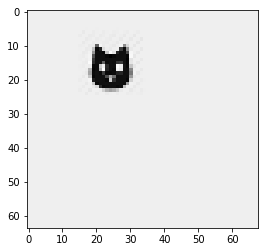

In [8]:
image1 = mpimg.imread("Cat11.png")
image1 = rgb2gray(image1)
print(image1.shape)
plt.imshow(image1,cmap="gray")
plt.show()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Translated image


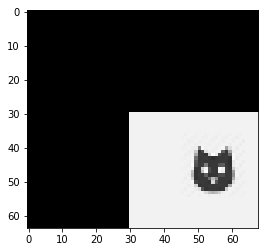

Features after conv(Trans)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]]
Features after Trans(conv)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.22044605e-16
  2.22044605e-16 2.22044605e-16]]


In [9]:
X = tf.convert_to_tensor(image1)
inp1 = tf.reshape(X, [-1, 64,68,1])

#------------Conv(Trans)------------------------------------
#Translate the image
trans1 = tf.contrib.image.translate(inp1,[30,30])

#Convolution
k = tf.constant([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=tf.float64)

kernel = tf.reshape(k, [3, 3, 1, 1])
conv1 = tf.nn.conv2d(trans1, kernel, [1, 1, 1, 1],padding="VALID")
fc1 = tf.layers.flatten(conv1)

#---------------------Trans(conv)--------------------
conv2 = tf.nn.conv2d(inp1, kernel, [1, 2, 2, 1],padding="VALID")
#Translate the image
trans2 = tf.contrib.image.translate(conv2,[30,30])

fc2 = tf.layers.flatten(trans2)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
print("Translated image")
trans_image = sess.run(trans1)
new_img = np.reshape(trans_image,[64,68])
plt.imshow(new_img,cmap="gray")
plt.show()
print("Features after conv(Trans)")
conv_out1 = sess.run(fc1)
print(conv_out1)
print("Features after Trans(conv)")
conv_out2 = sess.run(fc2)
print(conv_out2)
sess.close()

# Rotational invariance

(28, 28)


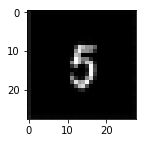

In [16]:
#image = mpimg.imread("sobel1.jpg")
image1 = mpimg.imread("d111.png")
image1 = rgb2gray(image1)
print(image1.shape)
plt.figure(figsize = (2,2))
plt.imshow(image1,cmap="gray")
plt.show()


In [11]:
#image = mpimg.imread("sobel1.jpg")
# image2 = mpimg.imread("d333.png")
# image2 = rgb2gray(image2)
# print(image2.shape)
# plt.figure(figsize = (2,2))
# plt.imshow(image2,cmap="gray")
# plt.show()


In [17]:
k = tf.constant([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=tf.float64)
#k = tf.constant([[0, -1, 0], [-1, 10, 1],[0,-1, 0]], dtype=tf.float64)
kernel = tf.reshape(k, [3, 3, 1, 1])

X = tf.convert_to_tensor(image1)
inp1 = tf.reshape(X, [-1, 28,28,1])

#------------------conv on image---------------------
# first Convolutional Layer
conv1 = tf.nn.conv2d(inp1, kernel, [1, 2, 2, 1],padding="VALID")

# first pooling layer
# Max Pooling (down-sampling) with strides of 2 and kernel size of 3
pool1 = tf.nn.max_pool(conv1, ksize=[1,3,3,1],strides = [1,2,2,1],padding='VALID')

#Flat layer
fc1 = tf.layers.flatten(pool1)

#---------------------Conv on rotated image------------------
# Y = tf.convert_to_tensor(image2)
# inp2 = tf.reshape(Y, [-1, 28,28,1])

# Rotate the image by 45 degrees
import math
Y = tf.contrib.image.rotate(image1, math.radians(45))
inp2 = tf.reshape(Y, [-1, 28,28,1])

# first Convolutional Layer
conv2 = tf.nn.conv2d(inp2, kernel, [1, 2, 2, 1],padding="VALID")

# first pooling layer
# Max Pooling (down-sampling) with strides of 2 and kernel size of 3
pool2 = tf.nn.max_pool(conv2, ksize=[1,3,3,1],strides =[1,2,2,1],padding='VALID')

#Flat layer
fc2 = tf.layers.flatten(pool2)


After convolution:  (1, 13, 13, 1)
After max pooling:  (1, 6, 6, 1)
Shape of features:  (1, 36)
Rotated image


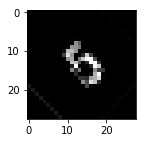

After convolution:  (1, 13, 13, 1)
After max pooling:  (1, 6, 6, 1)
Shape of features:  (1, 36)


In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
c1 = sess.run(conv1)
p1 = sess.run(pool1)
f1 = sess.run(fc1)
print("After convolution: ",c1.shape)
print("After max pooling: ",p1.shape)
print("Shape of features: ",f1.shape)
print("Rotated image")
rot_image = sess.run(Y)
rot_image = np.reshape(rot_image, [28,28])
plt.figure(figsize = (2,2))
plt.imshow(rot_image,cmap="gray")
plt.show()
c2 = sess.run(conv2)
p2 = sess.run(pool2)
f2 = sess.run(fc2)
print("After convolution: ",c2.shape)
print("After max pooling: ",p2.shape)
print("Shape of features: ",f2.shape)
sess.close()

In [19]:
print("Features after conv(x)")
print(np.round(f1,2))

Features after conv(x)
[[0.3  0.02 0.02 0.02 0.02 0.02 0.29 0.   3.99 3.99 1.55 0.   0.29 0.
  5.63 5.63 2.24 0.   0.3  0.   4.76 4.76 3.66 0.   0.3  0.   4.35 4.4
  2.29 0.   0.29 0.01 0.31 0.31 0.01 0.  ]]


In [20]:
print("Features after conv(Rot(x))")
print(np.round(f2,2))

Features after conv(Rot(x))
[[0.02 0.02 0.01 0.   0.03 0.02 0.02 0.83 3.74 2.53 0.   0.02 0.01 2.45
  4.64 5.32 5.32 0.   0.   0.6  3.82 5.6  5.6  0.   0.2  0.   1.15 5.6
  5.6  0.05 0.2  0.2  0.   0.   0.05 0.07]]


# 